In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando o database do Titanic
df = pd.read_csv(r'C:\Users\andre\Desktop\Curso python\Módulo 1\Codigo+e+Datasets\Aula 3\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1 - Entendendo os tipos de variáveis que temos na base

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Criando duas listas com nomes das colunas, uma para colunas qualitativas e outra para quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)
        

In [6]:
print('Lista Quanti: ', quanti)
print('Lista Quali: ', quali)

Lista Quanti:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Lista Quali:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 2 - Estatística Descritiva e Tabelas de Frequência

In [7]:
quanti

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [8]:
#Vamos criar um dataframe para as variáveis quanti para fazermos estatística descritiva

df_quanti = df[quanti]
#df[['Coluna1', 'Coluna2']]

In [9]:
df_quanti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [10]:
#Estatística Descritiva
df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Calculando Mediana que não está no comando anterior
df_quanti.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [12]:
#Tabela de frquência para as variáveis qualitativas
#Criando o df_quali

df_quali = df[quali]

#Fazendo uma tabela de frequência para a variável Sex

df_quali.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [13]:
#Fazendo todas as tabelas de frequência de uma vez só
#Vamos desconsiderar a variável Name que sempre será única para cada passageiro

for i in df_quali.columns:
    if i == 'Name':
        pass
    else:
        print('-------------------------')
        print('Variável: ', i)
        print(df_quali.groupby(i).Name.count())
        print('-------------------------')

-------------------------
Variável:  Sex
Sex
female    314
male      577
Name: Name, dtype: int64
-------------------------
-------------------------
Variável:  Ticket
Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
-------------------------
-------------------------
Variável:  Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
-------------------------
-------------------------
Variável:  Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
-------------------------


### 3 - Detecção de Dados Nulos

In [14]:
#Para cada variável no DF, iremos pegar a quantidade de dados nulos

#Iremos visualizar quantos nulos temos em cada variável
#Vamos criar uma tabela para visualizar isso (um Data Frame)

nulos = pd.DataFrame() #Função do Pandas que cria um Data Frame vazio
nulos['Variável'] = df.columns

In [15]:
nulos

,Variável
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [16]:
#Vamos colocar na outra coluna, a quantidade de nulos no DF

nulos['Quantidade'] = pd.Series()
nulos['Porcentagem'] = pd.Series()

for i in nulos.index:
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum() / df.PassengerId.count()) * 100

C:\Users\andre\AppData\Local\Temp\ipykernel_6920\543290265.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['Quantidade'] = pd.Series()
C:\Users\andre\AppData\Local\Temp\ipykernel_6920\543290265.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['Porcentagem'] = pd.Series()
C:\Users\andre\AppData\Local\Temp\ipykernel_6920\543290265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
C:\Users\andre\AppData\Local\Temp\ipykernel_6920\543290265.py:8: SettingWithCopyWarning: 
A value is trying to be set

In [17]:
nulos

,Variável,Quantidade,Porcentagem
0,PassengerId,0.0,0.000000
1,Survived,0.0,0.000000
2,Pclass,0.0,0.000000
3,Name,0.0,0.000000
4,Sex,0.0,0.000000
5,Age,177.0,19.865320
6,SibSp,0.0,0.000000
7,Parch,0.0,0.000000
8,Ticket,0.0,0.000000
9,Fare,0.0,0.000000


### Qual estratégia usar?<br>

#### Para a variável Cabin, temos muitos dados vazios. Se removermos todas as linhas vazias, podemos acabar com um dataframe sem quase nenhuma linha para usar.<br>

#### No caso da variável Age, também temos uma quantidade relevante de vazios (~20%)<br>

#### Apenas na variável Embarked temos poucos vazios (0,22%)<br>

### Faremos o seguinte:<br>

#### Removeremos as linhas vazias na variável Embarked<br>

#### Para Age e Cabin iremos preencher<br>

#### Age é quantitativa (podemos usar a média de idade para preencher os vazios)<br>

#### Cabin é qualitativa (podemos usar a moda, cabine que mais se repete para preencher)

In [18]:
#Removendo as linhas da variável Embarked

df2 = df.dropna(subset = ['Embarked'])

In [19]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
#Preechendo a variável Age
df3 = df2.copy()
df3.Age = df2.Age.fillna(df2.Age.mean())

In [21]:
df3.Age.isna().sum()

0

In [22]:
#Preenchendo a variável Cabin

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [23]:
#Temos mais de uma Moda na variável Cabin (mais de um valor é o que mais se repete)

#Então iremos escolher um valor dentro da moda e preencher aleatoriamente
moda = []
for i in df4.Cabin.mode().values:
    moda.append(i)

In [24]:
#Temos uma lista com os valores da Moda
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [25]:
#Preenchendo com valores aleatórios da Moda

import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))

In [26]:
df4.Cabin.isna().sum()

0

In [27]:
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C23 C25 C27,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,C23 C25 C27,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### 4 - Detecção de Outliers

<AxesSubplot:>

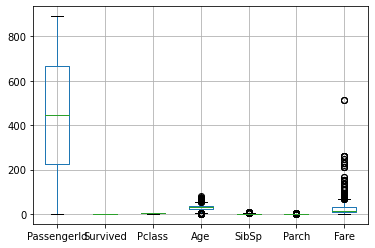

In [28]:
#Usaremos primeiro a boxplot como recurso

df4.boxplot()

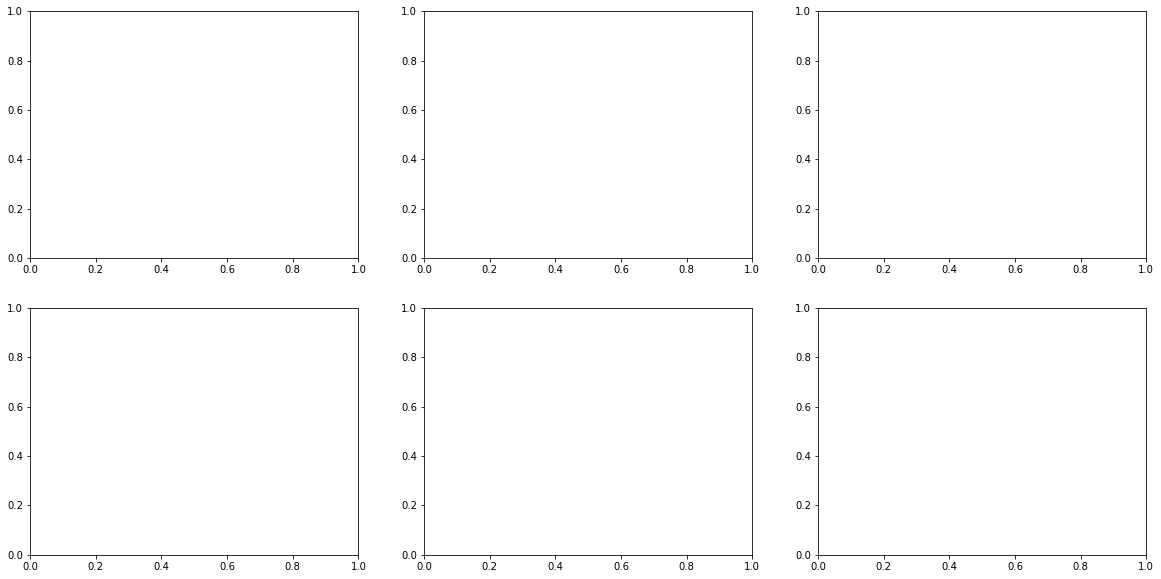

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x2ad34744a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad34751070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad347447c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad34751610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ad347518e0>],
 'means': []}

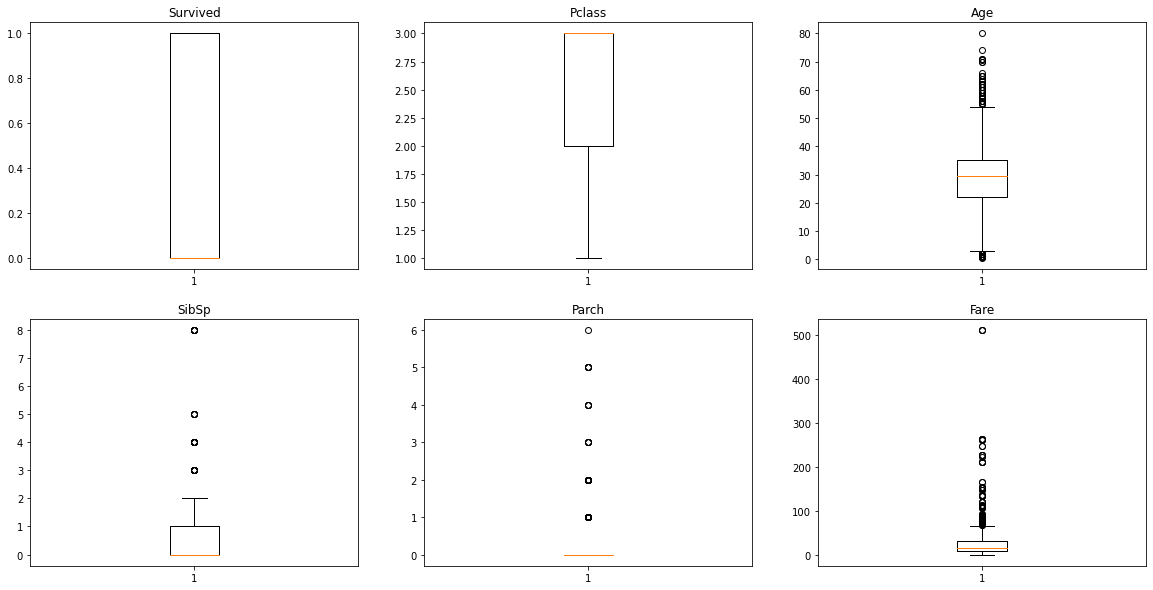

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

axs[0,0].set_title('Survived')
axs[0,0].boxplot(df2.Survived)

axs[0,1].set_title('Pclass')
axs[0,1].boxplot(df4.Pclass)

axs[0,2].set_title('Age')
axs[0,2].boxplot(df4.Age)

axs[1,0].set_title('SibSp')
axs[1,0].boxplot(df4.SibSp)

axs[1,1].set_title('Parch')
axs[1,1].boxplot(df4.Parch)

axs[1,2].set_title('Fare')
axs[1,2].boxplot(df4.Fare)



### Dependendo da variável temos uma quantidade muito grande de outliers, por exemplo Parch, Age, Fare<br>

### Vamos estudar estas 3 variáveis calculando qual a % de outliers